# REDUKCJA WYMIARU

Przed zajęciami można obejrzeć serię wykładów 14.x by Andrew Ng. Pierwszy:
https://www.youtube.com/watch?v=Zbr5hyJNGCs

# SVD

Interpretacja geometryczna mnożenia macierzy

[[0.  0. ]
 [0.  1. ]
 [0.  2. ]
 [0.  3. ]
 [0.  4. ]
 [0.  5. ]
 [0.5 5. ]
 [1.  5. ]]


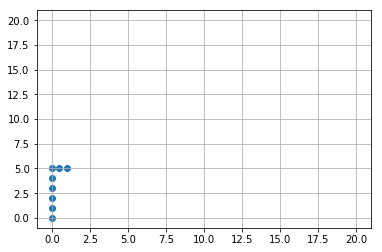

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = np.array([[0,0],[0,1],[0,2],[0,3],[0,4],[0,5],[0.5,5],[1,5]])
print(x)
plt.scatter(x[:,0],x[:,1])
plt.xlim(-1,21)
plt.ylim(-1,21)
plt.grid()
plt.show()

In [3]:
def plot_transform_xa(x,a):
    """
    wizualizacja mnozenia macierzy a * x
    """
    
    print(a)
    y = np.dot(x,a)
    
    plt.figure(figsize=(15,3.4))
    
    plt.subplot(1,4,1)
    
    plt.scatter(x[:,0],x[:,1])
    plt.xlim(-21,21)
    plt.ylim(-21,21)

    plt.subplot(1,4,2)
    plt.scatter(y[:,0],y[:,1])
    plt.xlim(-21,21)
    plt.ylim(-21,21)

    plt.subplot(1,4,3)
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    plt.arrow(0, 0, 0, 1, head_width=0.2, head_length=0.2, fc='red', ec='red')
    plt.arrow(0, 0, 1, 0, head_width=0.2, head_length=0.2, fc='red', ec='red')
 
    plt.subplot(1,4,4)
    plt.xlim(-6,6)
    plt.ylim(-6,6)

    #plt.arrow(0, 0, a[0,0],a[1,0], head_width=0.2, head_length=0.2, fc='red', ec='red')
    #plt.arrow(0, 0, a[0,1],a[1,1], head_width=0.2, head_length=0.2, fc='red', ec='red')

    plt.arrow(0, 0, a[0,0],a[0,1], head_width=0.2, head_length=0.2, fc='red', ec='red')
    plt.arrow(0, 0, a[1,0],a[1,1], head_width=0.2, head_length=0.2, fc='red', ec='red')
    
    plt.show()

[[4 0]
 [0 4]]


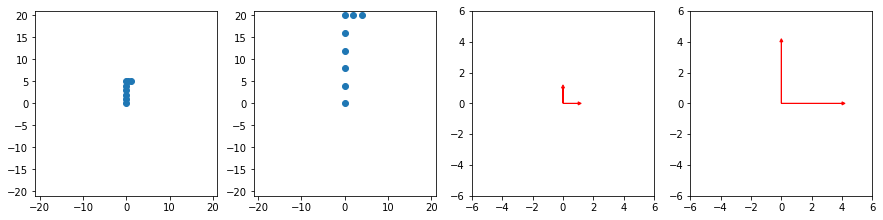

In [4]:
a = np.diag([4,4])
plot_transform_xa(x,a)

Co tu widzimy?
- wiersze x - obserwacje - punkty w naszej przestrzeni
- wiersz ax - obserwacje przetworzone
- pierwsze strzalki - reprezentuja układ współrzędnych
- drugie strzałki - nowy układ współrzędnych

[[4 0]
 [0 2]]


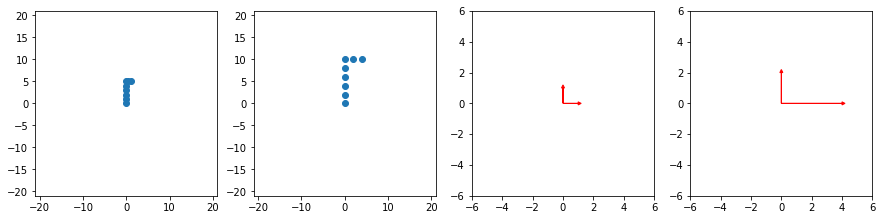

In [5]:
a = np.diag([4,2])
plot_transform_xa(x,a)

[[2 0]
 [0 4]]


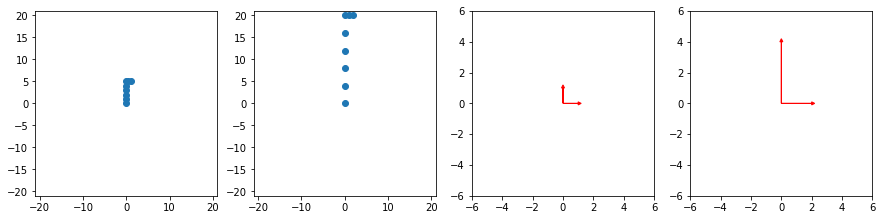

In [6]:
a = np.diag([2,4])
plot_transform_xa(x,a)

Wniosek: macierze diagonalne to macierze skalujące

$y^i = x^i * a_{ii}$ - i-ta kolumna wyniku mnożenia to i-ta kolumna x razy i-ty element diagonali a

### Co się stanie jak na przekątnej będą zera?

In [ ]:
a = np.diag([2,0])
plot_transform_xa(x,a)

In [ ]:
a = np.diag([0,3])
plot_transform_xa(x,a)

### Czyli rzutujemy na PODPRZESTRZEŃ (tylko na część wymiarów) - znikają wymiary, które zostały "wyzerowane".

### Inny typ macierzy

In [ ]:
t = np.pi/6 

a = np.array([[np.cos(t),-np.sin(t)],[np.sin(t),np.cos(t)]])
a

In [ ]:
np.dot(a,a.T) # DIAGONALNA (Z DOKŁADNOŚCI DO NUMERYKI) - A nazywa się macierzą ORTOGONALNĄ

In [ ]:
np.linalg.det(a) # wyznacznik rowny 1

In [ ]:
plot_transform_xa(x,a) 

### Ogólnie - macierz ortogonalna (czyli taka ze a*a' = I, i det(a)=1) jest wielowymiarową macierzą obrotu.

### Pytanie: co się stanie jak a będzie iloczynem macierzy skalującej i obrotu?

In [ ]:
t = -np.pi/3
a = np.dot(np.diag([4,4]),np.array([[np.cos(t),-np.sin(t)],[np.sin(t),np.cos(t)]]))
plot_transform_xa(x,a)

#### Złożenie macierzy skalującej z zerem i macierzy obrotu:

In [ ]:
t = np.pi/4
a = np.dot(np.array([[0,0],[0,3]]),np.array([[np.cos(t),-np.sin(t)],[np.sin(t),np.cos(t)]]))
plot_transform_xa(x,a)

## Podsumowanie:

Przemnożenie przez macierz to REPREZENTACJA NASZYCH DANYCH W INNYM UKŁADZIE WSPÓŁRZĘDNYCH  - inaczej zrzutowanie naszych punktów do nowej przestrzeni liniowej, którą definiją nam wiersze tej macierzy.

# Rozkład SVD 

## X - macierz $ m\times n$

rozkładamy macierz na trzy czynniki:


## $ X = U \times \Sigma \times V^t$

, gdzie: $U: m \times m , S: m \times n, V: n \times n $

- U i V - ortogonalne o wyznacznikach 1 (są to macierze zawierające wektory osobliwe). Są to macierze obrotu.
- $\Sigma$ - macierz wartości osobliwych - $diag(\sigma_1, ..., \sigma_k)$ ,  sigmy uporządkowane malejąco. Macierz jest tego samego wymiary co X zawsze (czyli diagonalna, ale prostokątna). Jest to macierz skalująca.

<img src="Grafika/svd.jpg" width="800">

Źródło: https://www.google.pl/search?q=svd&client=ubuntu&hs=LnO&channel=fs&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjI0b_Bj7HUAhUGQJoKHTXtAb8Q_AUICigB#channel=fs&tbm=isch&q=svd+decomposition&imgrc=jIHtm6dIDFPLAM:

## Interpretacja:

## $X^j = (U \Sigma V^t)^j = U \times (\Sigma V^t)^j = U \times \Sigma \times (V^t)^j$ 

czyli $j$-ta kolummna $X$ jest reprezentacją $j$-tej kolumy $(V^t)$, czyli $j$-tego wiersza $V$, gdzie

$X^j$ - cecha, którą obserwujemy, a $(V^t)^j$ to cech ukryta. 

<br>

<br>

<br>

<br>

### Analogicznie:

## $X_i = (U \Sigma V^t)_i = (U \Sigma)_i \times V^t = U_i \times \Sigma \times V^t$

# Pytanie: po co nam to?

<br>

<br>

## Odpowiedź:

### Wartości elementów diagonali macierzy $\Sigma$ mówią o tym, jak ważna jest dana cecha ukryta!

Duża wartosć oznacza, że cecha jest istotna - zawiera dużo informacji. Mała - że nie jest ważna - jest szumem.


<br>

### Zatem pomysł jest następujący: 

### Wykorzystajmy do reprezentacji X tylko ważne cechy ukryte.

## Zobaczmy jak to wygląda w praktyce

In [5]:
X = np.random.multivariate_normal([0,0,0],np.array([[1,0.999,0],[0.999,1,0],[0,0,1]]),20)
print(X)

[[-1.08071148 -1.11104605  0.96326533]
 [-0.51514417 -0.51223989 -0.27757114]
 [-0.02012104 -0.07293005  0.42276953]
 [ 1.95765734  2.02508956  0.70785112]
 [-1.56906482 -1.52994943  0.07208395]
 [-0.62411363 -0.69721353 -0.92930261]
 [ 2.31070312  2.25506271  0.76205604]
 [-1.20013112 -1.2210567  -1.40966281]
 [-0.46596547 -0.54722162 -1.87289563]
 [ 0.47683182  0.522978   -0.87709584]
 [-2.21105768 -2.20024244 -1.68095705]
 [ 1.35975051  1.26975138 -0.39019359]
 [ 1.38416714  1.36507613  0.7372714 ]
 [-1.19211223 -1.18184066  0.02767601]
 [-1.50388476 -1.47560711  0.87704534]
 [-0.48777753 -0.50993308  2.35807715]
 [-0.80116753 -0.80596616  2.0322022 ]
 [ 0.68948545  0.69221918  1.99956541]
 [ 0.65137128  0.60324481  3.26366144]
 [ 0.4847475   0.48338332  0.34892492]]


### Czyli mamy dwie bardzo silnie skorelowane zmienne

In [6]:
U, s, V = np.linalg.svd(X, full_matrices=True)
S = np.zeros_like(X)
np.fill_diagonal(S,s)

print(U)
print(S)
print(V)

[[ -1.25335869e-01   2.66435080e-01  -1.77592573e-01   4.36332894e-01
   -2.38592573e-01  -1.92904935e-01   3.34742290e-01  -2.18381847e-01
   -1.53748452e-01   1.69546638e-01  -3.56256960e-01   1.38570977e-01
    2.13441867e-01  -2.06830642e-01  -2.59002001e-01  -1.72158067e-01
   -1.99423209e-01   8.65694292e-02  -1.69295613e-02   7.98944912e-02]
 [ -9.64892373e-02   8.76638916e-03   4.53899333e-03  -3.19404007e-01
   -2.31633546e-01   3.85088147e-01   2.98650097e-01   1.30984440e-01
    4.64665621e-01  -1.86158593e-01  -3.88252577e-02   4.92225399e-01
    9.74742006e-02  -7.82032646e-02  -2.06599681e-01   1.07707536e-02
   -7.01687041e-02  -7.38426151e-02   1.30784175e-01   4.24004918e-03]
 [  1.44511987e-02   7.21273106e-02  -2.68294865e-01  -7.32374176e-04
    1.38085304e-02   4.81665850e-02  -1.55206901e-01   1.79779909e-01
    1.89655237e-01   2.02243063e-01   2.46941848e-01  -2.89938626e-02
   -1.19895857e-01  -9.09000989e-03  -1.25824395e-01  -4.07132957e-01
   -3.38858630e-01

### Sprawdźmy czy się zgadza:

In [7]:
np.dot(np.dot(U,S),V)

array([[-1.08071148, -1.11104605,  0.96326533],
       [-0.51514417, -0.51223989, -0.27757114],
       [-0.02012104, -0.07293005,  0.42276953],
       [ 1.95765734,  2.02508956,  0.70785112],
       [-1.56906482, -1.52994943,  0.07208395],
       [-0.62411363, -0.69721353, -0.92930261],
       [ 2.31070312,  2.25506271,  0.76205604],
       [-1.20013112, -1.2210567 , -1.40966281],
       [-0.46596547, -0.54722162, -1.87289563],
       [ 0.47683182,  0.522978  , -0.87709584],
       [-2.21105768, -2.20024244, -1.68095705],
       [ 1.35975051,  1.26975138, -0.39019359],
       [ 1.38416714,  1.36507613,  0.7372714 ],
       [-1.19211223, -1.18184066,  0.02767601],
       [-1.50388476, -1.47560711,  0.87704534],
       [-0.48777753, -0.50993308,  2.35807715],
       [-0.80116753, -0.80596616,  2.0322022 ],
       [ 0.68948545,  0.69221918,  1.99956541],
       [ 0.65137128,  0.60324481,  3.26366144],
       [ 0.4847475 ,  0.48338332,  0.34892492]])

### Patrzymy na istotność zmiennych

In [9]:
S   #   Widzimy, że trzeci wymiar nie niesie dużo informacji (wzgledem wczesniejszych)

array([[ 8.04320359,  0.        ,  0.        ],
       [ 0.        ,  5.70859825,  0.        ],
       [ 0.        ,  0.        ,  0.14009481],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

### Odtwórzmy X - policzmy przybliżenie na podstawie tylko dwóch wymiarów V i porównajmy z X

Czyli uznajemy, że jedna cecha nieistotna i zerujemy ten wymiar (tak jak to robiliśmy na początku).

In [10]:
S[2,2]=0
print(S)
np.dot(np.dot(U,S),V)

[[ 8.04320359  0.          0.        ]
 [ 0.          5.70859825  0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]


array([[-1.09826803, -1.09341733,  0.96325885],
       [-0.51469545, -0.51269045, -0.27757098],
       [-0.04664429, -0.04629777,  0.42275973],
       [ 1.99525017,  1.98734218,  0.707865  ],
       [-1.55273236, -1.54634902,  0.07208998],
       [-0.66176983, -0.65940253, -0.92931652],
       [ 2.28747287,  2.27838846,  0.76204746],
       [-1.21279109, -1.20834469, -1.40966749],
       [-0.50720244, -0.50581513, -1.87291086],
       [ 0.50104214,  0.49866816, -0.8770869 ],
       [-2.20986679, -2.20143823, -1.68095661],
       [ 1.31760647,  1.31206867, -0.39020916],
       [ 1.3773194 ,  1.37195201,  0.73726887],
       [-1.18942178, -1.18454216,  0.027677  ],
       [-1.4929858 , -1.48655087,  0.87704937],
       [-0.50028751, -0.49737168,  2.35807253],
       [-0.80558067, -0.80153488,  2.03220057],
       [ 0.69189577,  0.68979895,  1.9995663 ],
       [ 0.62804113,  0.62667086,  3.26365282],
       [ 0.48499348,  0.48313633,  0.34892501]])

In [12]:
X # Nie jest to samo, ale bardzo, bardzo podobne

array([[-1.08071148, -1.11104605,  0.96326533],
       [-0.51514417, -0.51223989, -0.27757114],
       [-0.02012104, -0.07293005,  0.42276953],
       [ 1.95765734,  2.02508956,  0.70785112],
       [-1.56906482, -1.52994943,  0.07208395],
       [-0.62411363, -0.69721353, -0.92930261],
       [ 2.31070312,  2.25506271,  0.76205604],
       [-1.20013112, -1.2210567 , -1.40966281],
       [-0.46596547, -0.54722162, -1.87289563],
       [ 0.47683182,  0.522978  , -0.87709584],
       [-2.21105768, -2.20024244, -1.68095705],
       [ 1.35975051,  1.26975138, -0.39019359],
       [ 1.38416714,  1.36507613,  0.7372714 ],
       [-1.19211223, -1.18184066,  0.02767601],
       [-1.50388476, -1.47560711,  0.87704534],
       [-0.48777753, -0.50993308,  2.35807715],
       [-0.80116753, -0.80596616,  2.0322022 ],
       [ 0.68948545,  0.69221918,  1.99956541],
       [ 0.65137128,  0.60324481,  3.26366144],
       [ 0.4847475 ,  0.48338332,  0.34892492]])

#### Czyli co zrobiliśmy? Mieliśmy naszą reprezentację US - wycięliśmy jej jeden wymiar, który uznaliśmy za nieistotny i odtworzyliśmy na tej podstawie X i okazało się, że jest bardzo zbliżony.

#### Czyli rozkład SVD wykrył, że te dwie zmienne niosą tak naprawdę jedną informację, czyli tak jakby pochodzą z jednego źródła (cechy w ukrytej przestrzeni).

Zamiast zerować wyrazy w macierzy $\Sigma$, można otrzymać to samo inaczej:

In [13]:
np.dot(np.dot(U[:,:2],S[:2,:2]),V[:2,:])

array([[-1.09826803, -1.09341733,  0.96325885],
       [-0.51469545, -0.51269045, -0.27757098],
       [-0.04664429, -0.04629777,  0.42275973],
       [ 1.99525017,  1.98734218,  0.707865  ],
       [-1.55273236, -1.54634902,  0.07208998],
       [-0.66176983, -0.65940253, -0.92931652],
       [ 2.28747287,  2.27838846,  0.76204746],
       [-1.21279109, -1.20834469, -1.40966749],
       [-0.50720244, -0.50581513, -1.87291086],
       [ 0.50104214,  0.49866816, -0.8770869 ],
       [-2.20986679, -2.20143823, -1.68095661],
       [ 1.31760647,  1.31206867, -0.39020916],
       [ 1.3773194 ,  1.37195201,  0.73726887],
       [-1.18942178, -1.18454216,  0.027677  ],
       [-1.4929858 , -1.48655087,  0.87704937],
       [-0.50028751, -0.49737168,  2.35807253],
       [-0.80558067, -0.80153488,  2.03220057],
       [ 0.69189577,  0.68979895,  1.9995663 ],
       [ 0.62804113,  0.62667086,  3.26365282],
       [ 0.48499348,  0.48313633,  0.34892501]])

## Fakt matematyczny: przybliżenie X w taki sposób - zerując wszystkie poza k największymi elementami Sigmy - jest najlepszym możliwym przybliżeniem  w k-wymiarowej przestrzeni.

### Powtórzmy ten przykład dla dwóch zmiennych liniowo zależnych

In [22]:
a = np.arange(1,301).reshape((50,6))
b = np.random.multivariate_normal([0]*15,np.diag([0.1]*15),6)

# a - ukryte cechy, 
# b - sposób przełożenia tych cech na cechy obserwowane w naszym świecie (tworzą szum)

x = np.dot(a,b) 
# x - cechy obserwowane przez nas

np.set_printoptions(2,suppress=True)

print(a[:5,:])
x[:5,:5]

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]]


array([[  0.92,   0.44,  -3.4 ,  -1.33,  -0.69],
       [  3.65,   0.08,  -8.49,  -6.89,  -0.73],
       [  6.38,  -0.28, -13.57, -12.45,  -0.77],
       [  9.12,  -0.63, -18.66, -18.01,  -0.81],
       [ 11.85,  -0.99, -23.74, -23.57,  -0.85]])

In [23]:
U, s, V = np.linalg.svd(x)
S = np.zeros_like(x)
np.fill_diagonal(S,s)
print(s)

[ 2633.62    16.74     0.       0.       0.       0.       0.       0.
     0.       0.       0.       0.       0.       0.       0.  ]


In [26]:
np.dot(np.dot(U[:,0:2],S[:2,:2]),V[:2,:])[:5,:5]

array([[  0.92,   0.44,  -3.4 ,  -1.33,  -0.69],
       [  3.65,   0.08,  -8.49,  -6.89,  -0.73],
       [  6.38,  -0.28, -13.57, -12.45,  -0.77],
       [  9.12,  -0.63, -18.66, -18.01,  -0.81],
       [ 11.85,  -0.99, -23.74, -23.57,  -0.85]])

In [27]:
x[:5,:5]

array([[  0.92,   0.44,  -3.4 ,  -1.33,  -0.69],
       [  3.65,   0.08,  -8.49,  -6.89,  -0.73],
       [  6.38,  -0.28, -13.57, -12.45,  -0.77],
       [  9.12,  -0.63, -18.66, -18.01,  -0.81],
       [ 11.85,  -0.99, -23.74, -23.57,  -0.85]])

### Podobny przykład jak przed chwilą, ale kolumny w a niezależne

In [28]:
a = np.random.multivariate_normal([0]*3,np.diag([1]*3),100)
b = np.random.multivariate_normal([0]*15,np.diag([0.1]*15),3)

# DODAJMY DO NASZEGO X SZUM

x = np.dot(a,b) + np.random.multivariate_normal([0]*15,np.diag([0.01]*15),100)

np.set_printoptions(2,suppress=True) 
print(x[:5,:])

U, s, V = np.linalg.svd(x)
S = np.zeros_like(x)
np.fill_diagonal(S,s)
print(s)

[[ 1.22 -0.52 -0.69  0.92 -0.99  0.01 -0.72  0.58  0.57  0.49 -1.   -0.03
   0.05 -0.17 -0.16]
 [ 0.03 -0.11  0.03  0.21  0.24  0.24 -0.13 -0.2   0.56 -0.27  0.1  -0.01
   0.07  0.34  0.02]
 [ 0.36  0.33  0.    0.04  0.95  0.75 -0.35 -0.87  1.04 -1.04  0.59  0.42
   0.61  1.07 -0.32]
 [ 0.78  0.58 -0.18  0.27 -0.31  0.67  0.17  0.13 -0.41 -0.6   0.2   0.67
   0.08 -0.05 -0.54]
 [-0.12 -0.73 -0.13  0.45 -0.41 -0.88 -0.31  0.34 -0.34  0.96 -0.95 -0.76
  -0.29 -0.61  0.48]]
[ 15.99  11.11  10.2    1.32   1.2    1.12   1.04   1.03   1.     0.92
   0.9    0.89   0.82   0.79   0.72]


wykryte trzy ukryte cechy

In [29]:
np.dot(np.dot(U[:,:3],S[:3,:3]),V[:3,:]) # szału nie ma ale generalnie jest dobrze

array([[ 1.21, -0.65, -0.62, ...,  0.02, -0.23, -0.31],
       [ 0.1 , -0.04,  0.  , ...,  0.17,  0.34, -0.05],
       [ 0.35,  0.38,  0.14, ...,  0.53,  1.1 , -0.34],
       ..., 
       [-0.07, -0.37, -0.02, ...,  0.21,  0.42,  0.11],
       [ 0.28, -0.05, -0.11, ...,  0.02, -0.  , -0.11],
       [ 0.16,  1.05,  0.31, ...,  0.22,  0.54, -0.42]])

# Przetwarzanie obrazu

http://www.ams.org/samplings/feature-column/fcarc-svd

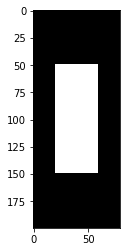

In [3]:
np.set_printoptions()
x = np.zeros((200,80))
x[50:150,20:60] = 1

plt.gray()
plt.imshow(x)
plt.show()

(array([  0,   0,   0, ..., 199, 199, 199]), array([ 1,  4,  6, ..., 77, 78, 79]))


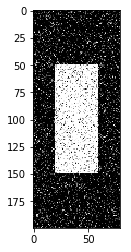

In [4]:
#zaszumiamy:
losowe_indeksy = np.random.choice(2,size=x.shape,p=[0.5,0.5]).nonzero()
print(losowe_indeksy)
x[losowe_indeksy] = x[losowe_indeksy] + np.random.normal(0,0.4,len(losowe_indeksy[0]))
x[x>1] = 1 # zeby pozbyc sie ujemnych
x[x<0] = 0
plt.gray()
plt.imshow(x)
plt.show()

### Zadanie: odszumić obrazek

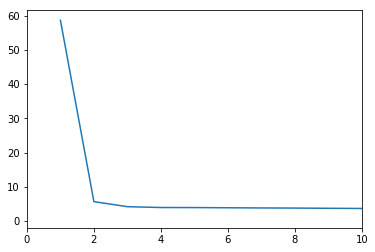

[ 58.62568231   5.69033077   4.21711535   3.9726589    3.95636155
   3.90253786   3.84497649   3.81069611   3.74793877   3.69677555
   3.62410073   3.53994406   3.5078354    3.44700835   3.4079807
   3.34312596   3.29968817   3.24891159   3.20846649   3.19110825
   3.1500428    3.11147528   3.08836445   3.00070675   2.9586434
   2.92781057   2.88206162   2.81607728   2.797401     2.74651043
   2.73360444   2.71658663   2.6778784    2.60946274   2.58753771
   2.55192321   2.49528864   2.46367088   2.4349609    2.43026918
   2.36350063   2.32001611   2.29753555   2.23254969   2.22117687
   2.21022318   2.15472771   2.12871605   2.10763564   2.09712408
   2.0236125    2.01010603   1.96978004   1.95546116   1.90210286
   1.88923449   1.85335752   1.82563606   1.74333772   1.71303634
   1.69595095   1.68370861   1.59995993   1.56173404   1.55679448
   1.51556603   1.49618177   1.43964441   1.41264993   1.37699747
   1.35025827   1.31354017   1.27782888   1.20332057   1.17576225
   1.1140732

In [5]:
U, s, V = np.linalg.svd(x)
S = np.zeros_like(x)
np.fill_diagonal(S,s)
plt.plot(range(1,len(s)+1),s)
plt.xlim(0,10)
plt.show()
print(s)

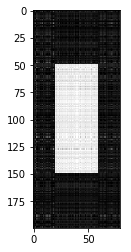

In [10]:
k = 3
x2 = np.dot(np.dot(U,S)[:,0:k],V[0:k,:])
x2[x2>1] = 1
x2[x2<0] = 0
plt.gray()
plt.imshow(x2)
plt.show()

### Zadanie - zredukować reprezentację obrazka kolorowego

Zadanie dodatkowe - podać ile bajtów zajmuje normalna reprezentacja, a ile reprezentacja zredukowana dobrej jakości

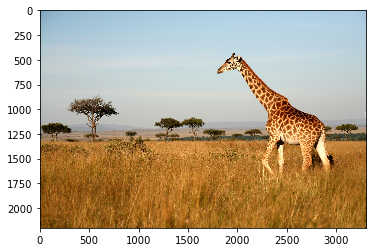

In [12]:
import PIL.Image as Image
im = Image.open("Dane/Obrazy/1.jpg")
plt.imshow(im)
plt.show()

In [1]:
im = np.array(im)/255
im
#im.nbytes

NameError: name 'np' is not defined

In [14]:
im_r = im[:,:,0]
im_g = im[:,:,1]
im_b = im[:,:,2]

In [15]:
U_r, s_r, V_r = np.linalg.svd(im_r)
U_g, s_g, V_g = np.linalg.svd(im_g)
U_b, s_b, V_b = np.linalg.svd(im_b)

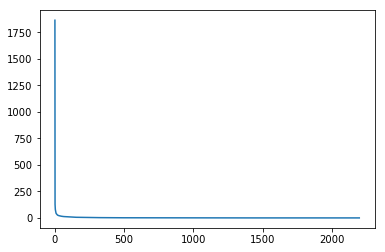

In [17]:
plt.plot(s_r)
plt.show()

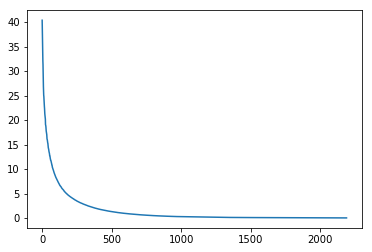

In [18]:
plt.plot(s_r[10:])
plt.show()

In [19]:
k = 150

im2_r = np.dot(np.dot(U_r[:,:k],np.diag(s_r[:k])),V_r[:k,:])
im2_g = np.dot(np.dot(U_g[:,:k],np.diag(s_g[:k])),V_g[:k,:])
im2_b = np.dot(np.dot(U_b[:,:k],np.diag(s_b[:k])),V_b[:k,:])

In [20]:
im2 = np.zeros_like(im)
im2[:,:,0] = im2_r
im2[:,:,1] = im2_g
im2[:,:,2] = im2_b
im2[im2<0] = 0
im2[im2>1] = 1

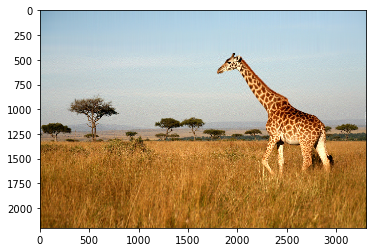

In [21]:
plt.imshow(im2)
plt.show()

In [23]:
im.nbytes

174240000

In [24]:
np.sum([x.nbytes for x in 
        [U_r[:,:k],s_r[:k],V_r[:k,:],
         U_g[:,:k],s_g[:k],V_g[:k,:],
         U_b[:,:k],s_b[:k],V_b[:k,:]]])

19803600

Czyli rozmiar zmniejszył się o rząd wielkości.

# Case study 

### Zaprojektować wyszukiwarkę: dla danego zapytania znaleźć tekst najbardziej adekwatny.

Podstawowy sposób reprezentacji tekstu to macierz wystąpień słów w dokumentach - oznacza to bardzo duży wymiar danych... 

Dlatego potrzebna redukcja. Pomysł: wykryć znaczenie tekstu znajdując ukryte cechy.

W praktyce rozkład SVD stosuje się w analizie podobieństwa tekstów (wyszukiwarki, systemy rekomendacyjne).

In [3]:
documents = [
    "morze plaża woda słońce piasek",
    "morze plaża piasek woda",
    "morze plaża słońce",
    "plaża woda piasek",
    "słońce woda plaża",
    "piasek woda",
    "krowa pies papuga",
    "pies kot"
]

In [4]:
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer()
dtm = cv.fit_transform(documents) 
dtm 

<8x9 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [33]:
cv.get_feature_names()

['kot',
 'krowa',
 'morze',
 'papuga',
 'piasek',
 'pies',
 'plaża',
 'słońce',
 'woda']

In [6]:
x = dtm.todense().T
x # wiersze słowa, kolumny - dokumenty

matrix([[0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1],
        [1, 1, 1, 1, 1, 0, 0, 0],
        [1, 0, 1, 0, 1, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 0, 0]], dtype=int64)

### Nasz cel - wyreprezentować dokumenty w niżej wymiarowej przestrzeni - znaleźć ich znaczenie.

In [15]:
U, s, V = np.linalg.svd(x)
S = np.zeros_like(x).astype('float')
np.fill_diagonal(S,s)
S[7,7]

7.053483725883806e-17

In [7]:
U, s, V = np.linalg.svd(x)
S = np.zeros_like(x).astype("float")
np.fill_diagonal(S,s)

In [79]:
def str_num_dotmul(str1, num):
    '''
    >>> str_num_dotmul(['a', 'b'],[[0, 1],[2,3]])
    [['', '1 a'], ['2 b', '3 b']] 
    '''
    
    def str_num_mul(str1, num):
        '''
        >>> str_num_mul('a', 1)
        "1 a"
        >>> str_num_mul('a', 0)
        " "
        '''

        if num == 0:
            return ""
        else:
            return " ".join([str(num), str1])

    vect_str_mul = np.vectorize(str_num_mul)
    
    return vect_str_mul(np.array(str1), np.array(num).T).T

str_num_dotmul(['a', 'b'],[[0, 1],[2,3]])  # [['', '1 a'], ['2 b', '3 b']]

array([['', '1 a'],
       ['2 b', '3 b']], dtype='<U3')

In [77]:
print(str_num_dotmul(np.array(cv.get_feature_names()), np.round(U,2)[:,:2]).T)

[['' '' '-0.35 morze' '' '-0.44 piasek' '' '-0.55 plaża' '-0.32 słońce'
  '-0.53 woda']
 ['0.28 kot' '0.45 krowa' '' '0.45 papuga' '' '0.72 pies' '' '' '']]


In [78]:
np.set_printoptions(8,suppress=True)
np.dot(np.dot(U,S),V)

matrix([[-0.,  0., -0., -0.,  0., -0.,  0.,  1.],
        [-0.,  0., -0., -0.,  0.,  0.,  1.,  0.],
        [ 1.,  1.,  1., -0., -0., -0., -0.,  0.],
        [-0.,  0., -0., -0.,  0.,  0.,  1.,  0.],
        [ 1.,  1., -0.,  1.,  0.,  1.,  0., -0.],
        [-0.,  0., -0., -0.,  0.,  0.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1., -0., -0., -0.],
        [ 1.,  0.,  1., -0.,  1.,  0., -0., -0.],
        [ 1.,  1., -0.,  1.,  1.,  1.,  0.,  0.]])

In [ ]:
np.dot(np.dot(U,S),V)

In [23]:
# Ile wziac skladowych?
S 

matrix([[3.86841101, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 1.90211303, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 1.78811065, 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 1.1755705 , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 1.12718351,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.67845744, 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.32742843, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [ ]:
k = 3


In [24]:
k = 3
np.set_printoptions(2,suppress=True)

x_n = V[:k,:] # - jedna kolumna reprezentuje jeden dokument (w mniejszej przestrzeni) 
#                 zatem bierzemy pierwsze k współrzędnych z każdego dokumentu
x_n

matrix([[-0.57, -0.48, -0.32, -0.39, -0.36, -0.25,  0.  ,  0.  ],
        [-0.  ,  0.  , -0.  , -0.  ,  0.  ,  0.  ,  0.85,  0.53],
        [-0.14,  0.19, -0.67,  0.39, -0.25,  0.53, -0.  , -0.  ]])

Spojrzmy na wyglad dokumentow w powyzszej przestrzeni cech ukrytych

### Pytanie: jak wyreprezentować przychodzące zapytanie w naszej przestrzeni V?

Spójrzmy jak otrzymać V z X mając rozkład svd:

$ X = USV \ \ $ => $ \ \ U^{-1} X = SV^t \ \ $ => $ \ \ S^{-1} U^{-1} X = V^t$ 

i wiemy, że $U^{-1} = U^t$.

Zatem co zrobić z nowym zapytanie, żeby otrzymać jego reprezentację w V? To samo co z X, czyli:

$ V^t_{nowe} = S^{-1} U^t X_{nowy}$

In [ ]:
#Zatem, aby otrzymać k-wymiarową reprezentację V z X:
dk = np.dot(np.linalg.inv(S[:k,:k]), np.dot(U.T[:k,:],x))
dk

In [ ]:
zapytanie = ["morze i słońce"]
zapytanie = cv.transform(zapytanie).todense().T # reprezentujemy zapytanie jak wektor wystapień słów
zapytanie

In [ ]:
#Zatem reprezentacja zapytania w przestrzeni dokumentów:
q = np.dot(np.linalg.inv(S[:k,:k]), np.dot(U.T[:k,:],zapytanie))
q

In [ ]:
dk

In [5]:
from sklearn.metrics import pairwise_distances
pairwise_distances(dk.T,q.T)

NameError: name 'dk' is not defined

In [ ]:
kolejnosc = np.argsort(np.squeeze(pairwise_distances(dk.T,q.T)))
kolejnosc

In [ ]:
np.array(documents)[kolejnosc]

### Zadanie dodatkowe: znaleźć tym razem SŁOWO najbardziej "podobne" do słowa "morze".

<br>

<br>

<br>
### SVD w sklearn.

Oczywiście w sklearn istnieje gotwe narzędzie do robienia rozkładu sklearn i działa ona w konwencji sklearna - mamy gotowy obiekt, który można dopasować do danych i zrobić wszystko co potrzebujemy:

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
<br>

<br>

# PCA


<img src="Grafika/pca1.png" width="740">

<img src="Grafika/pca2.png" width="400">

Źródło: https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0

<img src="Grafika/PCA.png" width="800">

Źródło: https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/

### Uwaga na skalę zmiennych!

In [7]:
import numpy as np

In [8]:
samples = np.loadtxt("Dane/seeds_dataset.txt")
grains = samples[:,[4,3]]
print(grains)
np.std(grains,0)

[[3.312 5.763]
 [3.333 5.554]
 [3.337 5.291]
 [3.379 5.324]
 [3.562 5.658]
 [3.312 5.386]
 [3.259 5.563]
 [3.302 5.42 ]
 [3.465 6.053]
 [3.505 5.884]
 [3.242 5.714]
 [3.201 5.438]
 [3.199 5.439]
 [3.156 5.479]
 [3.114 5.482]
 [3.333 5.351]
 [3.383 5.119]
 [3.514 5.527]
 [3.466 5.205]
 [3.049 5.226]
 [3.129 5.658]
 [3.168 5.52 ]
 [3.507 5.618]
 [2.936 5.099]
 [3.245 5.789]
 [3.421 5.833]
 [3.026 5.395]
 [2.956 5.395]
 [3.221 5.541]
 [3.065 5.516]
 [2.975 5.454]
 [3.371 5.757]
 [3.186 5.717]
 [3.15  5.585]
 [3.328 5.712]
 [3.485 5.709]
 [3.464 5.826]
 [3.683 5.832]
 [3.288 5.656]
 [3.298 5.397]
 [3.156 5.348]
 [3.158 5.351]
 [3.201 5.138]
 [3.396 5.877]
 [3.462 5.579]
 [3.155 5.376]
 [3.393 5.701]
 [3.377 5.57 ]
 [3.291 5.545]
 [3.258 5.678]
 [3.272 5.585]
 [3.434 5.674]
 [3.113 5.715]
 [3.199 5.504]
 [3.113 5.741]
 [3.212 5.702]
 [3.377 5.388]
 [3.412 5.384]
 [3.419 5.662]
 [3.032 5.159]
 [2.85  5.008]
 [2.879 4.902]
 [3.042 5.076]
 [3.07  5.395]
 [3.026 5.262]
 [3.119 5.139]
 [3.19  5.

array([0.37681405, 0.44200731])

In [14]:
import matplotlib.pyplot as plt

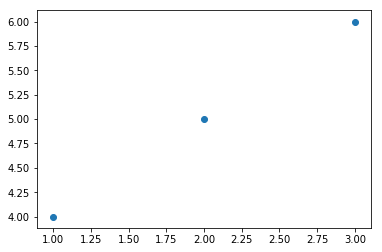

In [21]:
plt.scatter([1,2,3],[4,5,6])

In [30]:
rho = np.corrcoef(width, length)[0,1]
rho # Pearson's correlation coefficient

0.8604149377143466

In [47]:
nn = len(width)

In [54]:
tt = rho*np.sqrt((nn-2)/(1-rho**2)) # this guy supposedly follows t distribution

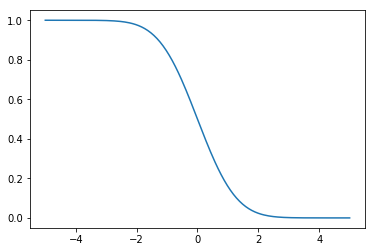

In [52]:
from scipy import stats
x = np.linspace(-5,5, num=200)
plt.plot(x, stats.t.sf(x, nn-2))

In [56]:
stats.t.sf(tt, nn-2) * 2 # probablity that rho would be at least this far from zero (either positive or negative) if width and length followed uncorrelated normal distributions

8.121332906194291e-63

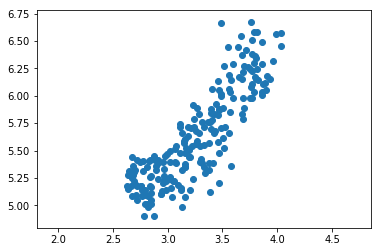

0.8604149377143467 8.121332906193427e-63


In [29]:
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

width = grains[:,0]
length = grains[:,1]

plt.scatter(width, length)
plt.axis('equal')
plt.show()

correlation, pvalue = pearsonr(width,length)

print(correlation, pvalue)

### Dopasowanie modelu i wizualizacja pierwszego kierunku, który znalazł

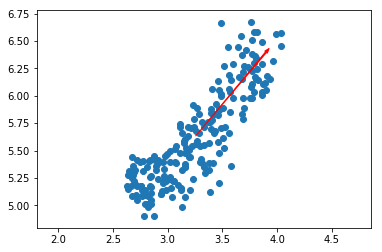

In [8]:
plt.scatter(grains[:,0], grains[:,1])

model = PCA()

model.fit(grains)

mean = model.mean_

first_pc = model.components_[0,:] # SKLADOWE - CZYLI KIERUNKI - w wierszach

plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

plt.axis('equal')
plt.show()

## Uwaga strzałka może wyjść w drugą stronę - kierunek ten sam, tylko zwrot przeciwny!

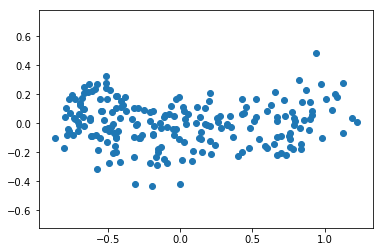

0.0


In [9]:
model = PCA()

pca_features = model.fit_transform(grains) # dwa wymiary, wiec rzutowanie jest na dwa wymiary

xs = pca_features[:,0]
ys = pca_features[:,1]

plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

correlation, pvalue = pearsonr(xs, ys)

print(correlation)

### Jak otrzymać nową postać mając x i kierunki? 

#### Kierunki przechowywane są w wierszach. Zatem trzeba pomnożyć przez transpozycję

In [51]:
print(pca_features[:5])
np.dot(grains-model.mean_, model.components_.T)[:5]

[[ 0.14  0.04]
 [-0.01 -0.1 ]
 [-0.21 -0.28]
 [-0.16 -0.29]
 [ 0.22 -0.21]]


array([[ 0.14,  0.04],
       [-0.01, -0.1 ],
       [-0.21, -0.28],
       [-0.16, -0.29],
       [ 0.22, -0.21]])

### Wizualizacja wartości "na nowych wymiarach"

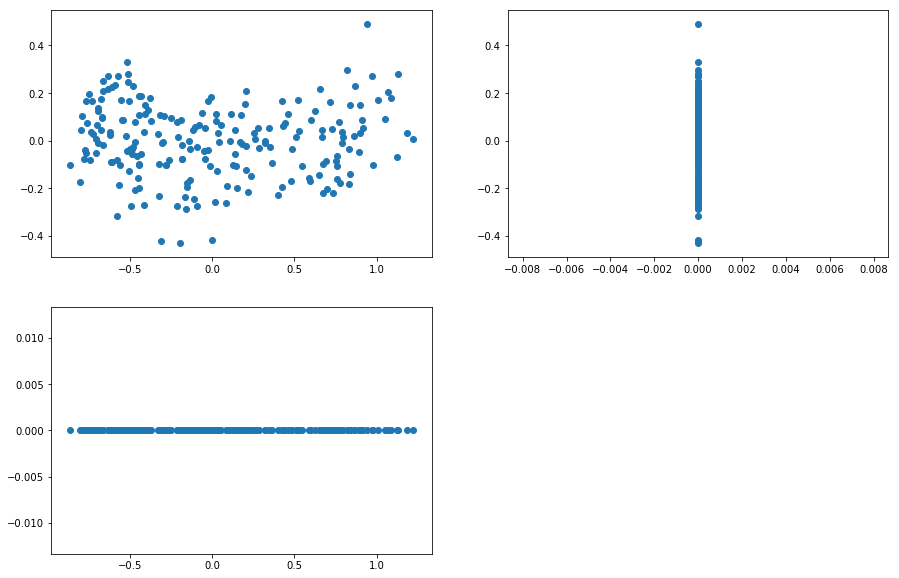

In [52]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.scatter(xs, ys)

plt.subplot(2,2,2)
plt.scatter(np.zeros_like(ys),ys)

plt.subplot(2,2,3)
plt.scatter(xs, np.zeros_like(xs))
plt.show()


In [53]:
np.var(xs), np.var(ys)

(0.31445007693287746, 0.022909210980954619)

In [54]:
model.explained_variance_

array([ 0.32,  0.02])

In [55]:
model.explained_variance_ratio_

array([ 0.93,  0.07])

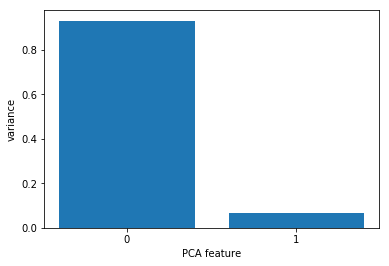

In [56]:
features = range(model.n_components_)
plt.bar(features, model.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

### Problem: jak wyznaczyć liczbę ważnych składowych?

In [57]:
s = np.diag([1.]*5)
s[[0,1,3,4],[1,0,4,3]] = 0.98
print(s)
x = np.random.multivariate_normal([0]*5,s,200)

[[ 1.    0.98  0.    0.    0.  ]
 [ 0.98  1.    0.    0.    0.  ]
 [ 0.    0.    1.    0.    0.  ]
 [ 0.    0.    0.    1.    0.98]
 [ 0.    0.    0.    0.98  1.  ]]


### Czyli mamy 5 zmiennych - dwie pary są silnie skorelowane

In [58]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [59]:
pca.components_.shape

(5, 5)

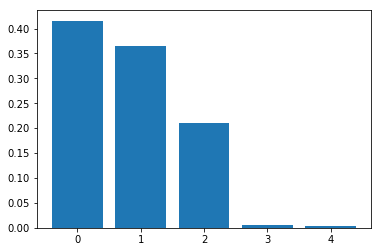

In [60]:
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.show()

### Ile wymiarów wziąć? oczywiście 3

To samo tylko wartości skumulowane:

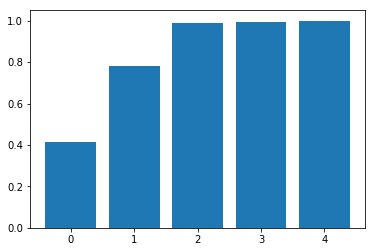

In [62]:
plt.bar(range(pca.n_components_),np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [63]:
pca.explained_variance_

array([ 1.96,  1.72,  0.99,  0.02,  0.02])

Podejrzyjmy dane w nowej przestrzeni:

In [64]:
pca.transform(x)[:10] # widzimy, że wielkości w dwóch ostatnich kolumnach są mniejsze niż trzech pierwszych i mała wariancja

array([[ 1.51,  0.45, -0.06, -0.21,  0.17],
       [ 1.98,  0.23,  0.68,  0.02, -0.14],
       [ 1.62,  0.13, -0.4 , -0.27, -0.03],
       [ 1.48, -1.16,  1.91, -0.07,  0.05],
       [ 0.62, -1.96,  1.25, -0.11, -0.05],
       [ 0.4 , -0.14, -1.19,  0.15,  0.03],
       [-2.27, -0.88, -0.71, -0.02,  0.01],
       [-0.61, -0.07, -1.07,  0.27, -0.  ],
       [ 1.92, -0.2 ,  0.03, -0.17,  0.14],
       [-2.23, -1.86,  0.09, -0.03,  0.12]])

In [ ]:
# zatem nasz nowa reprezentacja to trzy pierwsze kolummy
pca.transform(x)[:,:3]

### Zadanie. Rozważmy zbiór ryb. Ile wymiarów wystarczy, żeby je dobrze wyreprezentować?

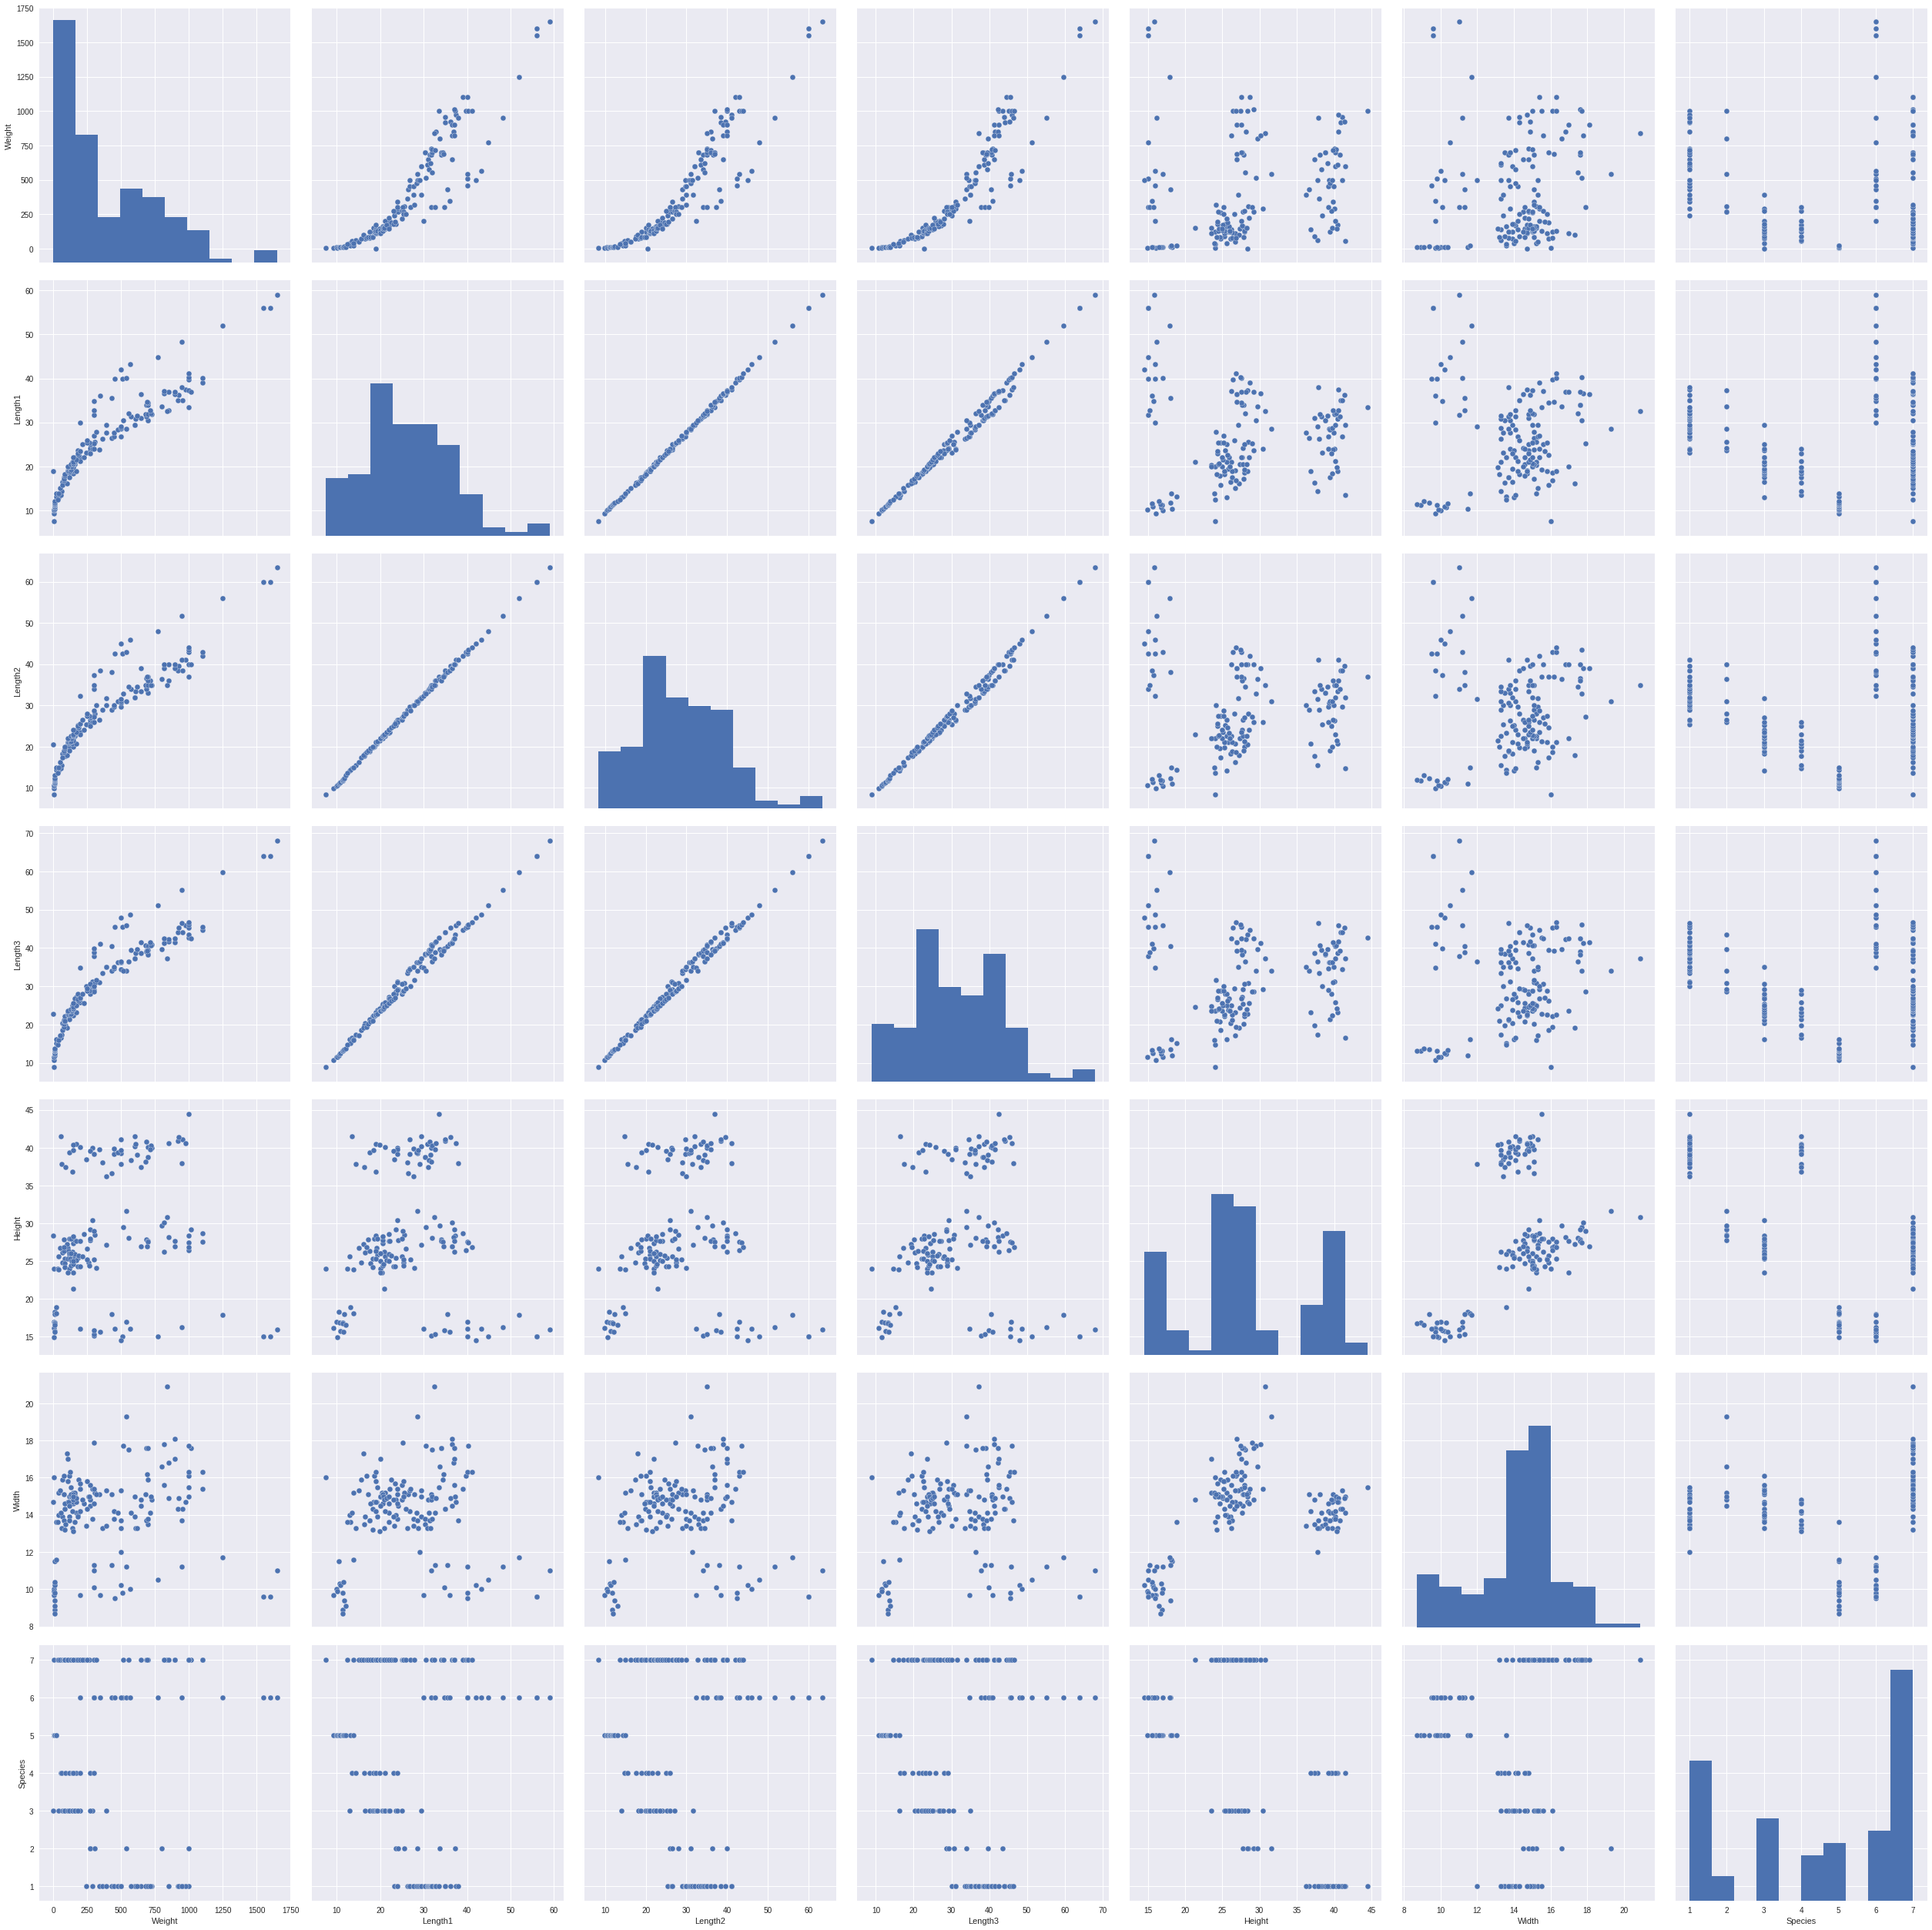

In [65]:
import pandas as pd
samples = pd.read_csv("Dane/fish.csv", sep=";",decimal=",")

import seaborn as sns
sns.pairplot(data=samples, size=5)
plt.show()

In [66]:
samples.describe()

,Weight,Length1,Length2,Length3,Height,Width,Species
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,398.695570,26.226582,28.393038,31.188608,28.256329,14.119620,4.518987
std,359.086204,10.024844,10.746572,11.637010,8.296377,2.281229,2.385523
min,0.000000,7.500000,8.400000,8.800000,14.500000,8.700000,1.000000
25%,120.000000,19.025000,21.000000,23.125000,24.225000,13.400000,2.250000
50%,272.500000,25.100000,27.150000,29.350000,27.000000,14.600000,5.000000
75%,650.000000,32.700000,35.750000,39.675000,37.700000,15.300000,7.000000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,20.900000,7.000000


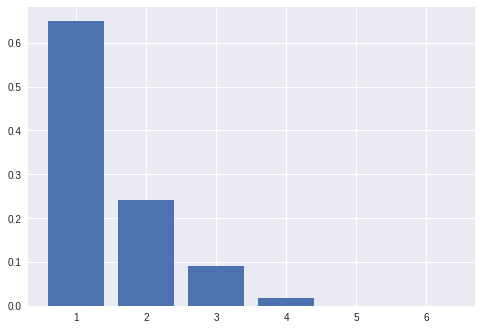

In [67]:
from sklearn.preprocessing import scale

pca = PCA()
pca.fit(scale(samples.drop(["Species"],axis=1)))
plt.bar(range(1,1+pca.n_components_),pca.explained_variance_ratio_)
plt.show()

In [68]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.65,  0.89,  0.98,  1.  ,  1.  ,  1.  ])

### Odpowiedź: 3 wymiary są wystarczające

### ZINTERPRETUJMY orztymane wymiary (cechy)

In [69]:
pca.components_  # kierunki to WIERSZE

array([[ 0.49,  0.5 ,  0.5 ,  0.5 ,  0.08,  0.05],
       [-0.04,  0.1 ,  0.08,  0.05, -0.7 , -0.7 ],
       [-0.02,  0.06,  0.05, -0.06, -0.7 ,  0.71],
       [-0.87,  0.27,  0.27,  0.28,  0.1 ,  0.05],
       [-0.  ,  0.5 ,  0.3 , -0.81,  0.09, -0.04],
       [-0.  ,  0.65, -0.76,  0.11,  0.  ,  0.01]])

Porównajmy powyższą interpretację z wykresami rozrzutu na danych

- pierwsze 4 zmienne są skorelowane - zrzutował je na jedną nową (w pierwszym wierszu 4 pierwsze wielkości ważne, a dwie ostatnie nieistotne)
- druga składowa - ostatnie dwie zrzutowanie na jeden wymiar
- trzecia składowa - zrzutowanie na drugi wymiar prostopadły do poprzedniego i zachowujący ponownei dwie ostatnie zmienne - czyli de facto kształt tych dwóch zmiennych został zachowany (tzn. w PCA wszystkie kolejne wymiary są prostopadłe do poprzednich, ale patrząc na znaki przy współrzędnych można zobaczyć, które wartości PCA chce zachować niezmienione)

Podsumowując: 4 pierwsze zmienne zostały zmienione w jedną, a dwie pozostał zostały zachowane.

### Wizualizacja - bardzo częste zastosowanie PCA

Zauważmy, że pierwsze dwie składowe wyjaśniają 90% wariancji - to dużo! Oznacza to, że dwa pierwsze wymiary dość dobrze opisują dane. A dwa wymiary można pokazać na wykresie!

Zbudujmy model od nowa.

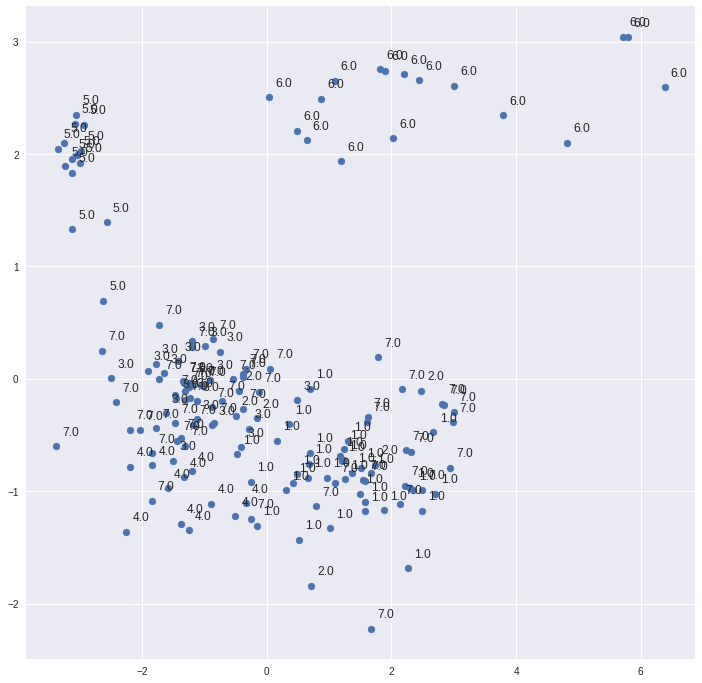

In [70]:
pca = PCA(2)
z = pca.fit_transform(scale(samples.iloc[:,:-1]))

plt.figure(figsize=(12,12))
plt.scatter(z[:,0],z[:,1])
for i in range(z.shape[0]):
    plt.annotate(samples.iloc[i,-1],xy=(z[i,0],z[i,1]),xytext = (z[i,0]+0.1,z[i,1]+0.1))
plt.show()

### Zadanie:

Na podstawie danych food, określić podobieństwo między zwyczajami jedzeniowymi mieszkańców krajów Wielkiej Brytanii.

http://www.dsc.ufcg.edu.br/~hmg/disciplinas/posgraduacao/rn-copin-2014.3/material/SignalProcPCA.pdf

Przygotowanie danych wspólnie - model i interpretacja - zadanie samodzielne.

In [71]:
import pandas as pd
food = pd.read_csv("Dane/food.txt",delimiter=" ",comment="#")
food

,food,England,Wales,Scotland,Ireland
0,Cheese,105,103,103,66
1,Carcass-meat,245,227,242,267
2,Other-meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats-and-oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh-potatoes,720,874,566,1033
7,Fresh-Veg,253,265,171,143
8,Other-Veg,488,570,418,355
9,Processed-potatoes,198,203,220,187


In [72]:
x = scale(np.array(food)[:,1:].T.astype("float")) # Wiersze to kraje
x.shape

(4, 17)

In [73]:
pca = PCA()
pca.fit(x)
pca.explained_variance_ratio_ # dwa wymiary wyjaśniają 96% procent - jest super

array([ 0.68,  0.25,  0.07,  0.  ])

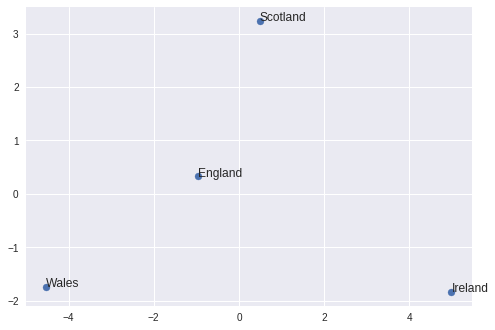

In [74]:
plt.scatter(pca.transform(x)[:,0],pca.transform(x)[:,1])
for i in range(4):
    plt.annotate(food.columns[i+1],
                 xy=(pca.transform(x)[i,0],pca.transform(x)[i,1]))
plt.show()

In [75]:
pca.components_.T # WYSWIETLAMY TRANSPOZYCJE ZEBY ŁATWIEJ CZYTAĆ
# pierwsza składowa - KOLUMNA - wszystkie zmienne oprócz trzech są istotne, a druga - te trzy

array([[-0.25,  0.25,  0.19,  0.02],
       [ 0.29, -0.08,  0.15, -0.77],
       [-0.26,  0.14, -0.3 , -0.52],
       [-0.29, -0.01,  0.2 , -0.17],
       [-0.13, -0.4 , -0.34, -0.18],
       [-0.28, -0.14, -0.05,  0.1 ],
       [ 0.1 , -0.45, -0.11,  0.03],
       [-0.27, -0.1 ,  0.35,  0.06],
       [-0.29, -0.09,  0.07,  0.07],
       [-0.12,  0.41, -0.32,  0.02],
       [-0.26, -0.15,  0.33, -0.04],
       [-0.28,  0.08,  0.24, -0.14],
       [-0.18, -0.33, -0.39,  0.13],
       [-0.28, -0.14, -0.15, -0.04],
       [ 0.23,  0.29, -0.17,  0.08],
       [-0.26,  0.23, -0.12, -0.06],
       [-0.25,  0.21, -0.25, -0.04]])

## Zadanie 2: przeanalizować charakterystyki miast przy użyciu PCA - zinterpretować składowe

In [13]:
miasta = pd.read_csv("Dane/Miasta.txt",sep="\t+")
miasta.head()

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,Work,Price,Salary
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5


In [ ]:
x = scale(miasta)

pca = PCA()
pca.fit(x)
pca.explained_variance_ratio_ # dwa wymiary wyjaśniają 93% procent

In [ ]:
z = pca.transform(x)
plt.scatter(z[:,0],z[:,1])
for i in range(x.shape[0]):
    plt.annotate(miasta.index[i],xy=(z[i,0],z[i,1]))
plt.show()

In [ ]:
pca.components_

### Zadanie 

Inne miasta - przeanalizować miasta przy użyciu PCA: ile głównych składowych, zinterpretować je, zidentyfikować wyróżniające się miasta


2. http://www.stat.nthu.edu.tw/~swcheng/Teaching/stat5191/assignment/assignment2.html

In [23]:
dane = pd.read_csv("Dane/places.txt",sep="\s+",header=0)
dane = dane.iloc[:,range(9)]
dane.head()

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ
"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


In [ ]:
pca = PCA()
pca.fit(scale(dane))
plt.bar(range(1,pca.n_components_+1),np.cumsum(pca.explained_variance_ratio_ ))
plt.show()

In [ ]:
k=0 # PRZEANALIZOWAĆ 0 I 1
order = np.argsort(np.abs(pca.components_[k,:]))
print(pca.components_[k,:][order])
dane.columns[order]

In [ ]:
z = pca.transform(scale(dane))
#print(z.shape)
plt.scatter(z[:,0],z[:,1])
for i in range(dane.shape[0]):
    if z[i,0]**2+z[i,1]**2 > 12:
        plt.annotate(dane.index[i],xy=(z[i,0],z[i,1]))
plt.show()

## Zastosowanie PCA do redukcji wymiaru dla regresji liniowej

*Ciekawostka: połączenie regresji liniowej z PCA jest nazywane PCR*

 Dane longley: https://www.datarobot.com/blog/ordinary-least-squares-in-python/

In [11]:
import pandas as pd
df = pd.read_csv('Dane/longley.csv', index_col=0)
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [12]:
df.shape

(16, 7)

In [13]:
df.corr()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
GNP.deflator,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149,0.970899
GNP,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273,0.983552
Unemployed,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257,0.502498
Armed.Forces,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245,0.457307
Population,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953,0.960391
Year,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000,0.971329
Employed,0.970899,0.983552,0.502498,0.457307,0.960391,0.971329,1.000000


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = df.iloc[:,[0,1,2,3,4]]
Y = df.iloc[:,-1]

lm = LinearRegression()
np.mean(cross_val_score(lm,X,Y,scoring='neg_mean_squared_error',cv=X.shape[0]))

-0.36580668330211008

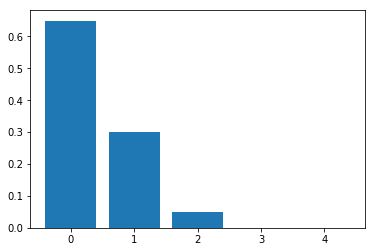

In [15]:
pca = PCA()
pca.fit(X)
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('pca', PCA(3)))
estimators.append(('lm', LinearRegression()))
sc_pca_lm = Pipeline(estimators)

np.mean(cross_val_score(sc_pca_lm,X,Y,scoring='neg_mean_squared_error',cv=X.shape[0]))

-0.30357799799854535

PCA pomogło - błąd jest mniejszy.

### Zadanie

Użyć PCA do redukcji wymiaru dla modelu regresji na danych yarn (p>n) i porównać z regresją lasso.

In [26]:
import pandas as pd

df = pd.read_csv("Dane/yarn.txt",sep=" ",index_col=0)
print(df.shape)
df.head().iloc[:,-5:]

(28, 270)


,V266,V267,V268,V269,V270
1,0.29440,0.29432,0.29443,100.00,1
2,0.30031,0.30030,0.30041,80.22,1
3,0.32464,0.32460,0.32474,79.49,1
4,0.30928,0.30932,0.30947,60.80,1
5,0.31021,0.31026,0.31049,59.97,1


LM + PCA

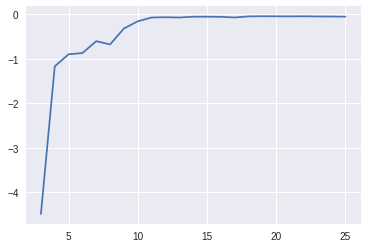

In [27]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
%matplotlib inline

X = df.iloc[:,:-2]
Y = df.iloc[:,-2]

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('pca', PCA()))
estimators.append(('lm', LinearRegression()))
sc_pca_lm = Pipeline(estimators)

s = GridSearchCV(sc_pca_lm,{"pca__n_components":range(3,26)},scoring='neg_mean_squared_error',cv=X.shape[0])
s.fit(X,Y)
#print(s.cv_results_)
plt.plot(range(3,26),s.cv_results_['mean_test_score'])
plt.show() # widzimy, że 10 składowych daje rade

In [33]:
s.best_score_

-0.0470817627444843

LASSO:

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Obje

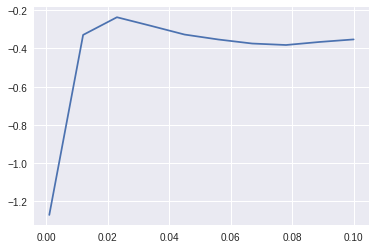

In [28]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('las', Lasso()))
sc_pca_lm = Pipeline(estimators)

s = GridSearchCV(sc_pca_lm,{"las__alpha":np.linspace(start=0.001,stop=0.1,num=10)},scoring='neg_mean_squared_error',cv=X.shape[0])
s.fit(X,Y)

plt.plot(np.linspace(start=0.001,stop=0.1,num=10),s.cv_results_['mean_test_score'])
plt.show() # widzimy, że 10 składowych daje rade

In [35]:
s.best_score_

-0.23640232860368413

PCA pomogło.

**Uwaga:** PCA nie zawsze musi pomóc, a nawet może zaszkodzić. Bo cenne informacje mogą być ukryte tam gdzie wariancja jest mała. W praktyce zawsze trzeba po prostu testować różne rozwiązania.

### Zadanie 1

Porównać samodzielny model regresji liniowej (LM) z pipelinem PCA+LM na danych Longley. Wyznaczyć rozsądną liczbę składowych w PCA. Oceniać kroswalidacyjnie (kroswalidacja tylu-krotna, ile wierszy w danych)

### Zadanie 2 - przygotowanie do jutrzejszych zajęć

1. W konsoli linuxowej:
 - pip install gensim
 - pip install nltk

2. w Jupyterze (pobieranie zasobów):
 - `import nltk`
 - `nltk.download()` (wyskoczy okienko)
 - zanaczamy wiersz "popular" i klikamy "download"

3. w Jupyterze:
 - `from sklearn.datasets import fetch_20newsgroups`
 - `newsgroups_train = fetch_20newsgroups(subset='train')`
 
### Zadanie 3

Zadanie klasyfikacji "spam or ham"z pierwszych zajęć - przetestować pipeline z uwzględnieniem redukcji wymiaru przy użyciu SVD.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

In [ ]:
sms = pd.read_table('Dane/sms.tsv', header=None, names=['label', 'message'])
sms['label'] = sms.label.map({'ham':0, 'spam':1})
X_train,X_test, y_train, y_test = train_test_split(sms.message, sms.label,test_size=1000)

In [ ]:
pipe = make_pipeline(CountVectorizer(),
                     StandardScaler(with_mean=False),
                    TruncatedSVD(100),
                    LogisticRegression())

In [ ]:
pipe.fit(X_train, y_train)

In [ ]:
accuracy_score(y_test, pipe.predict(X_test))

### Źródła i materiały


http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py


http://www.ams.org/samplings/feature-column/fcarc-svd

https://bugra.github.io/work/notes/2014-11-16/an-introduction-to-unsupervised-learning-scikit-learn/

https://alyssaq.github.io/2015/singular-value-decomposition-visualisation/
 
Przykład obrazujący dlaczego PCA może zaszkodzić:

https://blog.drskippy.com/2012/05/14/dimension-reduction-for-machine-learning-simple-example-of-svd-pca-pathology/